### Analyse OECD data on nr of worked hours

In [24]:
import pandas as pd

In [31]:
# import OECD data as DataFrame
data_oecd = "./DP_LIVE_25022019170559476.csv"
df_oecd = pd.read_csv(data_oecd, usecols=['LOCATION', 'TIME', 'Value'])
# rename to use better words
df_oecd.rename({"LOCATION":"country", "TIME": "year", "Value": "hours"}, axis='columns', inplace=True)
df_oecd.head()


,country,year,hours
0,AUS,1979,1832.3
1,AUS,1980,1830.9
2,AUS,1981,1816.8
3,AUS,1982,1792.5
4,AUS,1983,1779.1


In [26]:
# Restructure dataframe, make year the index
df_year = df_oecd.set_index(['year']) 

In [27]:
# store countries and years in series
countries = df_year['country'].unique()
years = df_year.index.unique().sort_values()

In [38]:
df_year.head()

,country,hours
year,,
1979,AUS,1832.3
1980,AUS,1830.9
1981,AUS,1816.8
1982,AUS,1792.5
1983,AUS,1779.1


In [43]:
df_year.groupby('year').hours.apply(lambda x: pd.Series(list(x)))

year    
1950  0     2193.32
      1     1821.00
      2     1968.00
1951  0     2214.49
      1     1812.00
      2     1986.00
1952  0     2197.78
      1     1812.00
      2     1988.00
1953  0     2179.01
      1     1794.00
      2     1992.00
1954  0     2193.64
      1     1804.00
      2     1984.00
1955  0     2179.04
      1     1794.00
      2     2003.00
1956  0     2130.53
      1     1772.00
      2     2002.00
1957  0     2107.13
      1     1772.00
      2     1973.00
1958  0     2096.43
      1     1743.00
      2     1947.00
1959  0     2100.08
      1     1719.00
      2     1957.00
             ...   
2017  7     1356.00
      8     1906.00
      9     1740.40
      10    1461.00
      11    1738.00
      12    1722.61
      13    1710.00
      14    2024.00
      15    1518.00
      16    2257.40
      17    1433.00
      18    1753.00
      19    1419.10
      20    1812.00
      21    1718.00
      22    1714.00
      23    1686.50
      24    1453.00
      25   

In [5]:
# turn duplicate years into new columns
# following tip at https://stackoverflow.com/questions/52084133/pandas-create-new-column-based-on-duplicates (retrieved 2019-02-25)
# df.groupby('id')['animal'].apply(lambda x: pd.Series(list(x))).unstack()
df = df_year.groupby('year')['hours'].apply(lambda x: pd.Series(list(x))).unstack() #.rename(columns=lambda x: countries[x])

In [30]:
df.head()

,AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,DEU,GRC,...,USA,CHL,EST,ISR,RUS,SVN,OECD,LVA,LTU,CRI
year,,,,,,,,,,,,,,,,,,,,,
1950,2193.32,1821.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,2214.49,1812.0,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2197.78,1812.0,1988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2179.01,1794.0,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2193.64,1804.0,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Done making decent DataFrame, now we can start looking at what we're interested in

In [29]:
# Check: Sweden's data:
df['SWE']

year
1950       NaN
1951       NaN
1952       NaN
1953       NaN
1954       NaN
1955       NaN
1956       NaN
1957       NaN
1958       NaN
1959       NaN
1960       NaN
1961       NaN
1962       NaN
1963       NaN
1964       NaN
1965       NaN
1966       NaN
1967       NaN
1968       NaN
1969       NaN
1970       NaN
1971       NaN
1972       NaN
1973       NaN
1974       NaN
1975       NaN
1976       NaN
1977       NaN
1978       NaN
1979       NaN
         ...  
1988       NaN
1989       NaN
1990       NaN
1991       NaN
1992       NaN
1993       NaN
1994       NaN
1995    1563.0
1996    1565.0
1997    1544.0
1998    1884.0
1999    1925.0
2000    1937.0
2001    1942.0
2002    1943.0
2003    1943.0
2004    1918.0
2005    1936.0
2006    1944.0
2007    1911.0
2008    1460.0
2009    1453.0
2010    1476.0
2011    1474.0
2012    1461.0
2013    1453.0
2014    1453.0
2015    1454.0
2016    1465.0
2017    1570.0
Name: SWE, Length: 68, dtype: float64

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

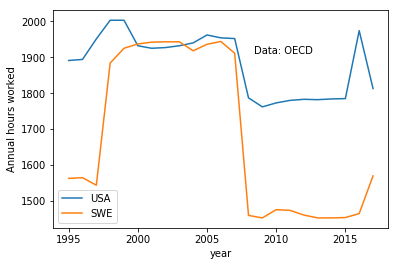

In [20]:
# Plot
fig = plt.figure()
ax = df.plot.line(y=['USA','SWE'])
ax.set(ylabel='Annual hours worked')
plt.text(0.6, 0.8, "Data: OECD", transform=ax.transAxes)
plt.savefig("hours-worked.pdf")
#ax.savefig("hours-worked.pdf")